In [312]:
#importing necessary libraries
import selenium
import numpy as np
import time
from selenium import webdriver

#initialising a web browser session by creating a driver object
driver = webdriver.Chrome(executable_path = 'C:/Users/ANIKET/Desktop/ANIKET/CN/chromedriver')
driver.get('https://www.instagram.com/')
time.sleep(2)

#Logging in into Instagram Handle via FACEBOOK
c=driver.find_element_by_class_name('KPnG0')
c.click()
time.sleep(2)

d=driver.find_element_by_id('email')
d.send_keys('SAMPLE_USERNAME')
time.sleep(2)

e=driver.find_element_by_id('pass')
e.send_keys('SAMPLE_PASSWORD')
time.sleep(2)
e.submit()

# Q1

## 1.1 From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

In [105]:
#locating the text box
f=driver.find_element_by_class_name('x3qfX')
f.clear()

#searching for food in the text box.
f.send_keys('food')
time.sleep(3)

#finding the names of food handles
g=driver.find_elements_by_class_name('Ap253')
names=[]
for i in range(10):
    names.append(g[i].text)

#collecting the followers of the food handles. 
followers=[]
for i in range(10):
    url='https://www.instagram.com/'+names[i]+'/'
    driver.get(url)
    time.sleep(2)
    c=driver.find_elements_by_class_name("g47SY ")
    followers.append((c[1].get_attribute('title')))
    
#collecting the top 5 and printing them
followers=np.array(followers)
for i in range(len(followers)):
    x=followers[i].replace(',','')
    followers[i]=x
    
followers=followers.astype(np.float)

#USE ARGSORT OF NUMPY FOR SORTING.
index=np.argsort(followers)

followers=followers[index]
names=np.array(names)
names=names[index]
for i in range(-1,-6,-1):
    print(names[i],':',followers[i])

yourfoodlab : 1325570.0
dilsefoodie : 565243.0
foodtalkindia : 299003.0
delhifoodguide : 105756.0
food_lunatic : 88995.0


## 1.2 Now Find the number of posts these handles have done in the previous 3 days.

In [201]:
#importing necessary libraries
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import datetime
import dateutil.parser
from datetime import datetime, timedelta

#array for number of posts @food handle
num_posts=[]

for i in range(-1,-6,-1):
    
    #initialising the number of posts to zero
    posts=0
    
    #creating the URL and opening the desired webpage
    url='https://www.instagram.com/'+names[i]+'/'
    driver.get(url)
    time.sleep(2)
    
    #locating and clicking on the first post.
    d=driver.find_element_by_class_name('_9AhH0')
    d.click()
    
    #collecting the date and time of uploading the post.
    wait = WebDriverWait(driver, 30)
    c= wait.until(EC.presence_of_element_located((By.TAG_NAME,'time')))
    y=c.get_attribute('datetime')
    
    #extracting the time and date from y. 
    a=y.split('T')[1].split('.')[0]  
    b=y.split('T')[0]
    date_time=a+' '+b 
    
    insertion_date = dateutil.parser.parse(date_time)
    
    #datetime.now() is the current time
    #subtracting the time of post uploading from current time.
    time_between_insertion = datetime.now() - insertion_date
    
    #if the time is less than 3 days, we move forward to next posts, else stop and move to next webpage.
    while  time_between_insertion.days<=3:
        
            #if the condition satisfies, we increment the number of posts by 1.
            posts+=1
            
            #moving to the next post
            wait = WebDriverWait(driver, 30)
            lap = wait.until(EC.presence_of_element_located((By.CLASS_NAME, 
                                                  'coreSpriteRightPaginationArrow')))
            lap.click()
            
            time.sleep(4)
            
            #Doing time calculations as explained above
            c= wait.until(EC.presence_of_element_located((By.TAG_NAME, 
                                                  'time')))
            y=c.get_attribute('datetime')

            a=y.split('T')[1].split('.')[0]  
            b=y.split('T')[0]
            date_time=a+' '+b
            insertion_date = dateutil.parser.parse(date_time)
            time_between_insertion = datetime.now() - insertion_date
    
    #Appending the number of posts of each handle in the list.
    num_posts.append(posts)

In [423]:
#Printing the number of posts these handles have as obtained from above code.
x=[]
for i in range(-1,-6,-1):
    x.append(names[i])
for i in range(len(x)):
    print(x[i],':',num_posts[i])

yourfoodlab : 4
dilsefoodie : 6
foodtalkindia : 4
delhifoodguide : 0
food_lunatic : 9


## 1.3 Depict this information using a suitable graph.

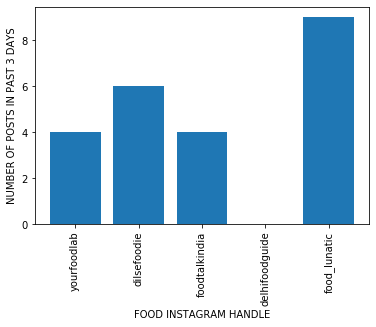

In [408]:
#import matplotlib
import matplotlib.pyplot as plt

plt.bar(x,num_posts)
plt.xlabel('FOOD INSTAGRAM HANDLE')
plt.ylabel('NUMBER OF POSTS IN PAST 3 DAYS')
plt.xticks(rotation=90)
plt.show()

# Q2

## 2.1 Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

In [443]:
#importing necessary libraries
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
contents=[]
for i in range(-1,-6,-1):
    
    print(names[i])
    li=[]
    
    #creating the url and opening desired webpage
    url='https://www.instagram.com/'+names[i]+'/'
    driver.get(url)
    
    #clicking on the first post
    d=driver.find_element_by_class_name('_9AhH0')
    d.click()
    
    time.sleep(5)
    
    #printing the caption of the first post by XPATH method
    caption=driver.find_element_by_xpath('//div[contains(@class,"C4VMK")]/span')
    print(caption.text)
    li.append(caption.text)
    
    #For the remaining 9 posts of the webpage
    for j in range(9):
        
        #clicking on the forward arrow
        wait = WebDriverWait(driver, 20)
        lap = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'coreSpriteRightPaginationArrow')))
        lap.click()
        
        #printing the text for post by XPATH method
        wait=WebDriverWait(driver,10)
        caption=wait.until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"C4VMK")]/span')))
        print(caption.text.strip())
        li.append(caption.text)
    contents.append(li)

yourfoodlab
Quick & easy Toasties - 4 ways Microwave Oven Chef @sanjyotkeer

Contest Alert! CookWithATwist with @morphyrichardsindia

Hello people! Hope you are enjoying the monsoon weather and with that, comes an exciting contest! Race to your kitchen and show us your twist on a recipe of your choice and stand a chance to win an exquisite Morphy Richards Microwave Oven.

To enter the contest –

1. Cook a recipe of your choice with an innovative twist.
2. Take an amazing original photo of your finished dish and upload the photo on your Facebook & Instagram handle tagging @morphyrichardsindia & @yourfoodlab & use the hashtag #CookWithATwist
3. Follow @morphyrichardsindia and & @yourfoodlab
4. Make sure you mention your 'Twist' of the recipe in the caption. Only three winners with the craziest twist stand a chance to win Contest ends on 1st of September, 2020! So Hurry up! Get creative and show us your version of #CookWithATwist
T&C apply* : https://www.morphyrichardsindia.com/tnc.aspx



## 2.2 Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [491]:
#initialising a dictionary
d={}

#iterating over the sentences
for i in range(len(contents)):
    for j in  range(10):
        
        #splitting the sentences to words seperated by space
        s=contents[i][j].split(' ')
        
        for ele in s:
            
            #removing emojis from each word 
            #with the help of function strip_emoji
            import re
            RE_EMOJI = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)

            def strip_emoji(text):
                return RE_EMOJI.sub(r'', text)

            a=strip_emoji(ele)
            
            #adding elements and their frequency to dictionary.
            if len(a):
                d[a]=d.get(a,0)+1

words=[]
frequency=[]
for ele in d:
    words.append(ele)
    frequency.append(d[ele])

## 2.3 Create a csv file with two columns : the word and its frequency

In [502]:
import csv

filename='instabot.csv'

fields=[words]
rows=[frequency]

# writing to csv file  
with open(filename, 'w',encoding="utf-8") as csvfile:  
    # creating a csv writer object  
    csvwriter = csv.writer(csvfile)  
        
    # writing the fields  
    csvwriter.writerow(fields)  
        
    # writing the data rows  
    csvwriter.writerows(rows) 

## 2.4 Find the hashtags that were most popular among these bloggers

In [505]:
#initiating two list variables for hashtags and their frequency
hashtag=[]
hashtag_freq=[]

#iterating over the dictionary
for ele in d:
    
    #collecting the hashtag words in our list
    if '#' in ele:
        hashtag.append(ele)
        hashtag_freq.append(d[ele])
        
#sorting the hashtag list according to their frequency 
#using the argsort() of numpy library.

import numpy as np

#convert to numpy arrays
hashtag=np.array(hashtag)
hashtag_freq=np.array(hashtag_freq)

#finding sort index
#argsort sorts in ascending order.
index=np.argsort(hashtag_freq)

#sorting array according to the sorting index.
hashtag=hashtag[index]
hashtag_freq=hashtag_freq[index]

## 2.5 Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

#foodie : 7
#indiancuisine : 6
#streetfood : 5
#contestalert : 4
#sanjyotkeer : 4


[]

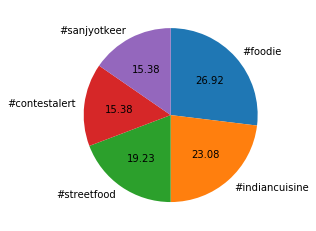

In [512]:
#plotting pie chart for the top 5 hashtags using matplotlib library.
import matplotlib.pyplot as plt
for i in range(-1,-6,-1):
    print(hashtag[i],':',hashtag_freq[i])
plt.pie(hashtag_freq[-1:-6:-1],labels=hashtag[-1:-6:-1],autopct='%.2f',startangle=90,counterclock=False)
plt.plot()

# Q3

## 3.1 Find out the likes of the top 10 posts of the 5 handles obtained earlier.

In [361]:
#handle_likes variable for storing 
#likes of first 10 posts of 5 handles.
handles_likes=[]

#import necessary libraries.
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import TimeoutException


for i in range(-1,-6,-1):
    sum=0
    post_likes=[]
    #creating the url and opening desired webpage
    url='https://www.instagram.com/'+names[i]+'/'
    driver.get(url)

    #clicking on the first post
    d=driver.find_element_by_class_name('_9AhH0')
    d.click()
    #initialising variable.
    var=0
    
    try : 
            ## Directly likes are given.
            
            wait = WebDriverWait(driver, 10)
            lap=wait.until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"Nm9Fw")]/button/span')))
            post_likes.append(lap.text.split(' ')[0]) 
            var=1
            
    except TimeoutException:
            
            ## Views are given
            ## So, we go step by step:
            
            ## Step1: First click on the views. 
            ## As we click, the number of likes appear.
            wait = WebDriverWait(driver, 10)
            lap = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'vcOH2')))
            lap.click()
            var=1
            
            ## Click on the number of likes.
            likes = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'vJRqr')))
            post_likes.append(likes.text.split(' ')[0])
            
            ## Click on the screen and make it accessible for clicking.
            wait = WebDriverWait(driver, 10)
            lap = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'QhbhU')))
            lap.click()

            ## Click on the Forward arrow and move to the next post.
            wait = WebDriverWait(driver, 10)
            lap = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'coreSpriteRightPaginationArrow')))
            lap.click()
            
    ## if directly likes given, then after noting the likes
    ## we move to the next post.
    if var==1:
            wait = WebDriverWait(driver, 10)
            lap = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'coreSpriteRightPaginationArrow')))
            lap.click()
            
    
    #SAME PROCEDURE AS ABOVE...
    #For the remaining 9 posts of the webpage
    for j in range(9):
        var=0

        try : 
            wait = WebDriverWait(driver, 20)
            lap=wait.until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"Nm9Fw")]/button/span')))
            post_likes.append(lap.text.split(' ')[0]) 
            var=1
        
        except TimeoutException:
            
            wait = WebDriverWait(driver, 10)
            lap = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'vcOH2')))
            lap.click()
            time.sleep(2)
            
            likes = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'vJRqr')))
            post_likes.append(likes.text.split(' ')[0])
            
            wait = WebDriverWait(driver, 10)
            lap = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'QhbhU')))
            lap.click()

            wait = WebDriverWait(driver, 10)
            lap = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'coreSpriteRightPaginationArrow')))
            lap.click()
            
        if var==1:
            
            wait = WebDriverWait(driver, 10)
            lap = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'coreSpriteRightPaginationArrow')))
            lap.click()
            
    #appending the likes list of each food handle.
    handles_likes.append(post_likes)

## 3.2 Calculate the average likes for a handle.

In [368]:
#initiating some variables. 
a=handles_likes
handles_likes=[]

In [424]:
total_likes=[]
for likes in a:
    
    #converting array to numpy array
    likes=np.array(likes)
    
    #for loop to remove the commas, EXAMPLE: '13,987' --> '13987'
    for i in range(len(likes)):
        ele=likes[i].replace(',','')
        likes[i]=ele
        
    #converting string --> float --> int
    likes=likes.astype(np.float)
    likes=likes.astype(np.int)
    
    #calculating the total likes and averaging 
    total_likes.append(np.sum(likes)/10)

In [425]:
#printing average likes for each of the 5 handle.
for i in range(len(x)):
    print(x[i],':',total_likes[i])

yourfoodlab : 31668.7
dilsefoodie : 8765.2
foodtalkindia : 3437.8
delhifoodguide : 1352.8
food_lunatic : 1353.5


In [438]:
## Extracting the number of followers for each of the 5 handle.
followers=[]
for i in range(-1,-6,-1):
    sum=0
    post_likes=[]
    
    #creating the url and opening desired webpage
    url='https://www.instagram.com/'+names[i]+'/'
    driver.get(url)
    wait = WebDriverWait(driver, 10)
    lap = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME,"g47SY ")))
    
    #appending the number of followers of the handles with the help of title attribute
    followers.append(lap[1].get_attribute('title'))

## 3.3 Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

In [439]:
followers=np.array(followers)

#for loop to remove the commas, EXAMPLE: '13,987' --> '13987'
for i in range(len(followers)):
    ele=followers[i].replace(',','')
    followers[i]=ele
    
#converting string --> float --> int
followers=followers.astype(np.float)
followers=followers.astype(np.int)

#calculating required ratio for each food blog and printing the same.
ratio=followers/total_likes
food_blog=[]
for i in range(len(x)):
    food_blog.append(x[i])
    print(x[i],':',ratio[i])

yourfoodlab : 41.88842611158652
dilsefoodie : 64.53748916168485
foodtalkindia : 86.98935365640817
delhifoodguide : 78.17267888823181
food_lunatic : 65.7584041374215


## 3.4 Create a bar graph to depict the above obtained information.

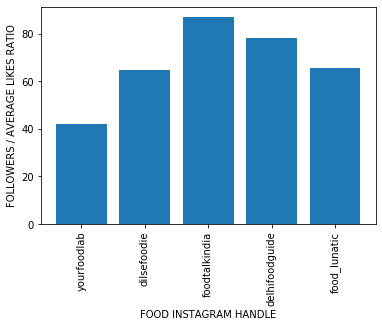

In [441]:
#Bar graph
import matplotlib.pyplot as plt
plt.bar(food_blog,ratio)
plt.xticks(rotation=90)
plt.xlabel('FOOD INSTAGRAM HANDLE')
plt.ylabel('FOLLOWERS / AVERAGE LIKES RATIO')
plt.show()